# M2177.003100 Deep Learning <br> Assignment #4 Implementing Conditional Generative Adversarial Nets - part2 MNIST data

Copyright (C) Data Science Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Jaeyoon Yoo, November 2017

In this notebook, you will learn how to implement conditional Genverative Adversarial Nets (cGANs) <br>
The goal here is to build GANs that draw a digit(MNIST data) given its label. <br> 

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **Team number** as input argument. <br>
This will produce a zipped file called *[Your team number].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; Team_#)

### Some helpful tutorials and references for assignment #2:
- [1] TensorFlow official tutorials. [[link]](https://www.tensorflow.org/get_started/get_started)
- [2] Stanford CS231n lectures. [[link]](http://cs231n.stanford.edu/)
- [3] Goodfellow, Ian, et al. "Generative adversarial nets." Advances in neural information processing systems. 2014.
- [4] Mirza, Mehdi, and Simon Osindero. "Conditional generative adversarial nets." arXiv preprint arXiv:1411.1784 (2014).
- [5] Radford, Alec, Luke Metz, and Soumith Chintala. "Unsupervised representation learning with deep convolutional generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015).

## 0. Download and load MNIST datasets
The MNIST datasets will be downloaded into the 'data' directory. If you want to change the directory the data is saved in, change mnist_data_dir with where you want. <br>

In [1]:
from download import *
import os
from utils import load_mnist
mnist_data_dir = './data'
prepare_data_dir(mnist_data_dir)
download_mnist(mnist_data_dir)
data_array , data_y = load_mnist(os.path.join(mnist_data_dir,'mnist'))
print(data_array.shape)
print(data_y.shape)

Found MNIST - skip
(70000, 28, 28, 1)
(70000, 10)


## <a name="1"></a> 1. Build a network

In this section, you will implement neural networks for (1) generative model to draw a digit (2) discriminative model to distinguish real image from generated image. You can use some function in *ops.py* or you can make it as you want. Just write the code in whatever way you find most clear.

In [3]:
from ops import conv2d
from ops import lrelu
from ops import de_conv
from ops import fully_connect
from ops import conv_cond_concat
from ops import batch_normal

import tensorflow as tf
import numpy as np

It is time for a generative model. It takes batch size, sample size(the dimension of latent variable or so called *noise*), y_dim(the dimension of label), the output size(should be 28 here) and z,y (Tensorflow Variables for latent variable and label respectively). It should return the image 28x28 output of which each element is in [0,1]. Note that you should define Tensorflow Variables within the variable scope.

You should utilize the label variable y in your model. The simplest way is concatenate the label variable and features or raw image.

In [6]:
def gern_net(batch_size, z , y , sample_size, y_dim, output_size):
    with tf.variable_scope('gen'):
        #### TODO ####
        w_init = tf.contrib.layers.xavier_initializer()

        cat1 = tf.concat([z, y], 1)

        dense1 = tf.layers.dense(cat1, 512, kernel_initializer=w_init)
        relu1 = tf.nn.relu(dense1)

        dense2 = tf.layers.dense(relu1, 784, kernel_initializer=w_init)
        o = tf.nn.tanh(dense2)

        return tf.reshape(o, [-1, output_size, output_size, 1])


Now, it's time for a discriminative model. It takes image data and label variable y. It should return the value for which the model is certain that the image is real and its logit. (i.e return the value in [0,1] and its logit). Note that you should define Tensorflow Variables within the variable scope again.

You may use the label variable or not. Here, again concatenating is the simplest way to utilize it.

In [7]:
def dis_net(image_data , y, reuse=False):
    with tf.variable_scope('dis',reuse=reuse):
        #### TODO ####
        w_init = tf.contrib.layers.xavier_initializer()

        cat1 = tf.concat([tf.contrib.layers.flatten(image_data), y], 1)

        dense1 = tf.layers.dense(cat1, 512, kernel_initializer=w_init)
        lrelu1 = lrelu(dense1, 0.2)

        dense2 = tf.layers.dense(lrelu1, 1, kernel_initializer=w_init)
        o = tf.nn.sigmoid(dense2)

        return o, dense2


## <a name="2"></a> 2. Build a main part and train it

In this section, you will implement the main part. You should define the loss function for each model(TODO part). Then run the code and check the model draws a digit for given label.

When you are done, run the following to check your implementations.

Following code will make 'samples_for_test' directory that resulting image will be saved in. You can change the directory as you want.

Also, you can change all other hyperparameters such as learning rate, batch size. But be sure to define **batch size bigger than 100**.

In [8]:
from utils import load_mnist
from utils import save_images
from utils import vis_square
from utils import sample_label
from utils import getNext_batch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

learning_rate = 0.0002
batch_size = 128
EPOCH = 20
loss_step    = 50
display_step = 50
sample_size = 100
y_dim = 10
channel = 1
output_size = 28
sample_dir = 'samples_for_test'

if os.path.exists(sample_dir) == False:
    os.makedirs(sample_dir)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Define the loss function in the TODO part. Modify only loss part.

Discriminator loss : log[D(x)] + log[1-D(G(z))]
Generator loss     : log[D(G(z)]

If you write the code correctly and run the code, it will display 10x10 images(each row shows one of the number). 

Also, it will save the generated images in the 'sample_dir' directory. So if you want to see it, check that directory.

**Please be sure that you ran the above codes**.

In [9]:
tf.reset_default_graph()

EPOCH 0 step 50: D: loss = 1.5223250 G: loss=0.4727578 
EPOCH 0 step 100: D: loss = 1.4283638 G: loss=0.6745481 
EPOCH 0 step 150: D: loss = 1.2380810 G: loss=0.7959033 
EPOCH 0 step 200: D: loss = 1.1158848 G: loss=0.8800437 
EPOCH 0 step 250: D: loss = 0.9833587 G: loss=0.9306024 
EPOCH 0 step 300: D: loss = 0.8859144 G: loss=0.9134492 
EPOCH 0 step 350: D: loss = 0.8515698 G: loss=0.9851384 
EPOCH 0 step 400: D: loss = 0.7880495 G: loss=1.0234673 
EPOCH 0 step 450: D: loss = 0.7581180 G: loss=1.0868843 
EPOCH 0 step 500: D: loss = 0.8841636 G: loss=0.9659994 


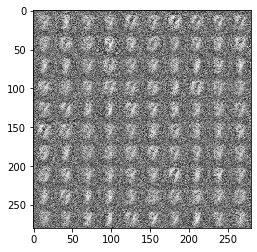

EPOCH 1 step 550: D: loss = 0.8917825 G: loss=0.9876180 
EPOCH 1 step 600: D: loss = 0.8459098 G: loss=1.0208700 
EPOCH 1 step 650: D: loss = 0.8186391 G: loss=1.1102625 
EPOCH 1 step 700: D: loss = 0.8261127 G: loss=1.1233907 
EPOCH 1 step 750: D: loss = 0.8519666 G: loss=1.1487281 
EPOCH 1 step 800: D: loss = 0.8807197 G: loss=1.1392217 
EPOCH 1 step 850: D: loss = 0.9749275 G: loss=1.1066377 
EPOCH 1 step 900: D: loss = 1.0133362 G: loss=1.0247114 
EPOCH 1 step 950: D: loss = 0.9441844 G: loss=1.0829782 
EPOCH 1 step 1000: D: loss = 0.9654524 G: loss=1.0351850 
EPOCH 1 step 1050: D: loss = 0.9646763 G: loss=1.1607560 


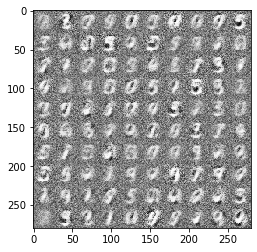

EPOCH 2 step 1100: D: loss = 0.9331869 G: loss=1.0879867 
EPOCH 2 step 1150: D: loss = 0.9261544 G: loss=1.0897517 
EPOCH 2 step 1200: D: loss = 0.7990956 G: loss=1.2138317 
EPOCH 2 step 1250: D: loss = 0.9010661 G: loss=1.1476625 
EPOCH 2 step 1300: D: loss = 0.9163728 G: loss=1.1376723 
EPOCH 2 step 1350: D: loss = 0.8477969 G: loss=1.1403368 
EPOCH 2 step 1400: D: loss = 0.8579463 G: loss=1.1474354 
EPOCH 2 step 1450: D: loss = 0.8672235 G: loss=1.1768408 
EPOCH 2 step 1500: D: loss = 0.9329361 G: loss=1.2047799 
EPOCH 2 step 1550: D: loss = 0.8305336 G: loss=1.2411382 
EPOCH 2 step 1600: D: loss = 0.7971549 G: loss=1.2123399 


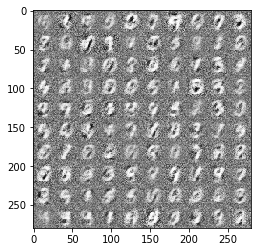

EPOCH 3 step 1650: D: loss = 0.7816743 G: loss=1.3045619 
EPOCH 3 step 1700: D: loss = 0.7950493 G: loss=1.2495513 
EPOCH 3 step 1750: D: loss = 0.7690328 G: loss=1.2457010 
EPOCH 3 step 1800: D: loss = 0.8133190 G: loss=1.1794242 
EPOCH 3 step 1850: D: loss = 0.7985657 G: loss=1.2321798 
EPOCH 3 step 1900: D: loss = 0.7636046 G: loss=1.2268403 
EPOCH 3 step 1950: D: loss = 0.7567655 G: loss=1.2560043 
EPOCH 3 step 2000: D: loss = 0.8235844 G: loss=1.2223128 
EPOCH 3 step 2050: D: loss = 0.8749520 G: loss=1.1630207 
EPOCH 3 step 2100: D: loss = 0.8217671 G: loss=1.1584077 
EPOCH 3 step 2150: D: loss = 0.8523903 G: loss=1.1732457 


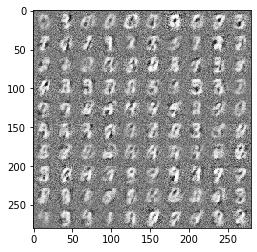

EPOCH 4 step 2200: D: loss = 0.8788025 G: loss=1.1921577 
EPOCH 4 step 2250: D: loss = 0.8989072 G: loss=1.1263200 
EPOCH 4 step 2300: D: loss = 0.8443014 G: loss=1.1891574 
EPOCH 4 step 2350: D: loss = 0.9395282 G: loss=1.0883079 
EPOCH 4 step 2400: D: loss = 0.8639615 G: loss=1.1327689 
EPOCH 4 step 2450: D: loss = 0.9199408 G: loss=1.0878401 
EPOCH 4 step 2500: D: loss = 0.9524333 G: loss=1.0619755 
EPOCH 4 step 2550: D: loss = 0.9476881 G: loss=1.0369160 
EPOCH 4 step 2600: D: loss = 0.9489982 G: loss=1.0654048 
EPOCH 4 step 2650: D: loss = 0.9271085 G: loss=1.0844810 
EPOCH 4 step 2700: D: loss = 0.9110867 G: loss=1.0676539 


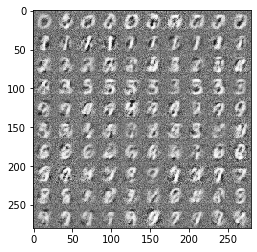

EPOCH 5 step 2750: D: loss = 0.9671515 G: loss=1.0778730 
EPOCH 5 step 2800: D: loss = 0.9141967 G: loss=1.1042925 
EPOCH 5 step 2850: D: loss = 0.9584633 G: loss=1.0605515 
EPOCH 5 step 2900: D: loss = 0.9842721 G: loss=1.0113715 
EPOCH 5 step 2950: D: loss = 0.9319638 G: loss=1.0684180 
EPOCH 5 step 3000: D: loss = 0.9822438 G: loss=1.0510918 
EPOCH 5 step 3050: D: loss = 0.9425157 G: loss=1.1011814 
EPOCH 5 step 3100: D: loss = 0.9327158 G: loss=1.0623188 
EPOCH 5 step 3150: D: loss = 0.8751543 G: loss=1.1396990 
EPOCH 5 step 3200: D: loss = 0.8710486 G: loss=1.1196907 
EPOCH 5 step 3250: D: loss = 0.9272841 G: loss=1.0683068 


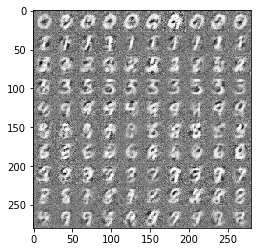

EPOCH 6 step 3300: D: loss = 0.9733336 G: loss=1.0691493 
EPOCH 6 step 3350: D: loss = 0.8568493 G: loss=1.1675627 
EPOCH 6 step 3400: D: loss = 0.8581473 G: loss=1.1146295 
EPOCH 6 step 3450: D: loss = 0.8741639 G: loss=1.1899645 
EPOCH 6 step 3500: D: loss = 0.8342801 G: loss=1.1987886 
EPOCH 6 step 3550: D: loss = 0.8326662 G: loss=1.1915827 
EPOCH 6 step 3600: D: loss = 0.8818489 G: loss=1.1689088 
EPOCH 6 step 3650: D: loss = 0.8295282 G: loss=1.1326678 
EPOCH 6 step 3700: D: loss = 0.7884498 G: loss=1.2175517 
EPOCH 6 step 3750: D: loss = 0.7874728 G: loss=1.2735765 
EPOCH 6 step 3800: D: loss = 0.7969200 G: loss=1.1872420 


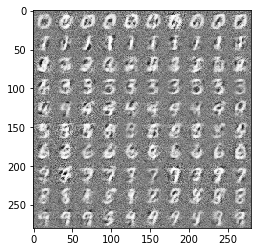

EPOCH 7 step 3850: D: loss = 0.7697753 G: loss=1.2596164 
EPOCH 7 step 3900: D: loss = 0.8209119 G: loss=1.1422553 
EPOCH 7 step 3950: D: loss = 0.7459596 G: loss=1.2576892 
EPOCH 7 step 4000: D: loss = 0.7719440 G: loss=1.2551939 
EPOCH 7 step 4050: D: loss = 0.7825928 G: loss=1.2478570 
EPOCH 7 step 4100: D: loss = 0.7647120 G: loss=1.2585118 
EPOCH 7 step 4150: D: loss = 0.7708898 G: loss=1.2168437 
EPOCH 7 step 4200: D: loss = 0.6994894 G: loss=1.3006740 
EPOCH 7 step 4250: D: loss = 0.7158229 G: loss=1.3108491 
EPOCH 7 step 4300: D: loss = 0.7443697 G: loss=1.2556937 
EPOCH 7 step 4350: D: loss = 0.8051028 G: loss=1.2253094 


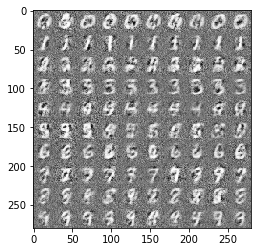

EPOCH 8 step 4400: D: loss = 0.7477829 G: loss=1.2827505 
EPOCH 8 step 4450: D: loss = 0.7384484 G: loss=1.3266225 
EPOCH 8 step 4500: D: loss = 0.7845305 G: loss=1.2808498 
EPOCH 8 step 4550: D: loss = 0.7615707 G: loss=1.3124673 
EPOCH 8 step 4600: D: loss = 0.8062765 G: loss=1.2849348 
EPOCH 8 step 4650: D: loss = 0.7324033 G: loss=1.3186368 
EPOCH 8 step 4700: D: loss = 0.6704618 G: loss=1.3373909 
EPOCH 8 step 4750: D: loss = 0.7071989 G: loss=1.3731358 
EPOCH 8 step 4800: D: loss = 0.7377571 G: loss=1.2756858 
EPOCH 8 step 4850: D: loss = 0.7117124 G: loss=1.2750028 
EPOCH 8 step 4900: D: loss = 0.7031629 G: loss=1.3209375 


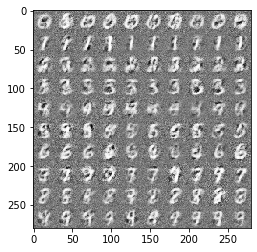

EPOCH 9 step 4950: D: loss = 0.6912698 G: loss=1.3244464 
EPOCH 9 step 5000: D: loss = 0.6600195 G: loss=1.4211907 
EPOCH 9 step 5050: D: loss = 0.7149506 G: loss=1.3197734 
EPOCH 9 step 5100: D: loss = 0.7407336 G: loss=1.2195944 
EPOCH 9 step 5150: D: loss = 0.6892847 G: loss=1.4378357 
EPOCH 9 step 5200: D: loss = 0.7001633 G: loss=1.3286494 
EPOCH 9 step 5250: D: loss = 0.7115025 G: loss=1.3912344 
EPOCH 9 step 5300: D: loss = 0.7019341 G: loss=1.3596215 
EPOCH 9 step 5350: D: loss = 0.7223533 G: loss=1.3439245 
EPOCH 9 step 5400: D: loss = 0.7262115 G: loss=1.3980224 
EPOCH 9 step 5450: D: loss = 0.6672807 G: loss=1.4292066 


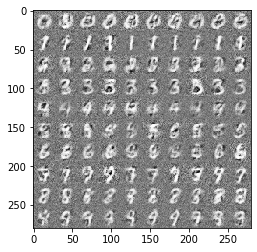

EPOCH 10 step 5500: D: loss = 0.6209249 G: loss=1.5723412 
EPOCH 10 step 5550: D: loss = 0.6871563 G: loss=1.4394982 
EPOCH 10 step 5600: D: loss = 0.6567501 G: loss=1.5025239 
EPOCH 10 step 5650: D: loss = 0.6414492 G: loss=1.4307215 
EPOCH 10 step 5700: D: loss = 0.6674186 G: loss=1.4638882 
EPOCH 10 step 5750: D: loss = 0.7202070 G: loss=1.3099127 
EPOCH 10 step 5800: D: loss = 0.6923718 G: loss=1.3565044 
EPOCH 10 step 5850: D: loss = 0.6510134 G: loss=1.5530355 
EPOCH 10 step 5900: D: loss = 0.6699841 G: loss=1.4375756 
EPOCH 10 step 5950: D: loss = 0.7076346 G: loss=1.3865509 
EPOCH 10 step 6000: D: loss = 0.5987380 G: loss=1.5929927 


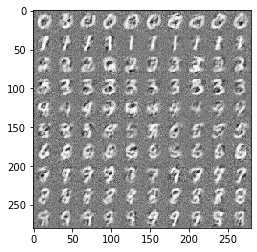

EPOCH 11 step 6050: D: loss = 0.5955814 G: loss=1.5716630 
EPOCH 11 step 6100: D: loss = 0.6434184 G: loss=1.5144306 
EPOCH 11 step 6150: D: loss = 0.6414902 G: loss=1.4988666 
EPOCH 11 step 6200: D: loss = 0.6380531 G: loss=1.5158958 
EPOCH 11 step 6250: D: loss = 0.6154455 G: loss=1.5413332 
EPOCH 11 step 6300: D: loss = 0.6953588 G: loss=1.4724193 
EPOCH 11 step 6350: D: loss = 0.6565105 G: loss=1.5305657 
EPOCH 11 step 6400: D: loss = 0.5610769 G: loss=1.5894495 
EPOCH 11 step 6450: D: loss = 0.6430763 G: loss=1.4829369 
EPOCH 11 step 6500: D: loss = 0.6197474 G: loss=1.4783797 
EPOCH 11 step 6550: D: loss = 0.6420884 G: loss=1.4497032 


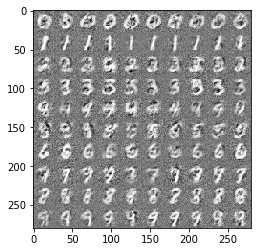

EPOCH 12 step 6600: D: loss = 0.6211318 G: loss=1.2951186 
EPOCH 12 step 6650: D: loss = 0.5702675 G: loss=1.5681194 
EPOCH 12 step 6700: D: loss = 0.6559373 G: loss=1.5691739 
EPOCH 12 step 6750: D: loss = 0.6354001 G: loss=1.5007041 
EPOCH 12 step 6800: D: loss = 0.6638870 G: loss=1.4357891 
EPOCH 12 step 6850: D: loss = 0.6669221 G: loss=1.4464306 
EPOCH 12 step 6900: D: loss = 0.5691754 G: loss=1.5884290 
EPOCH 12 step 6950: D: loss = 0.5391791 G: loss=1.6561000 
EPOCH 12 step 7000: D: loss = 0.5245063 G: loss=1.8105218 
EPOCH 12 step 7050: D: loss = 0.5767567 G: loss=1.5676161 


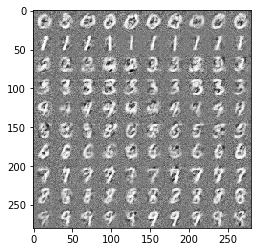

EPOCH 13 step 7100: D: loss = 0.5677065 G: loss=1.5334351 
EPOCH 13 step 7150: D: loss = 0.5430266 G: loss=1.5848899 
EPOCH 13 step 7200: D: loss = 0.6176684 G: loss=1.6654980 
EPOCH 13 step 7250: D: loss = 0.5613754 G: loss=1.5017548 
EPOCH 13 step 7300: D: loss = 0.5720837 G: loss=1.6429868 
EPOCH 13 step 7350: D: loss = 0.6049377 G: loss=1.4145485 
EPOCH 13 step 7400: D: loss = 0.5777112 G: loss=1.4784205 
EPOCH 13 step 7450: D: loss = 0.5497530 G: loss=1.6290147 
EPOCH 13 step 7500: D: loss = 0.5916970 G: loss=1.5504472 
EPOCH 13 step 7550: D: loss = 0.5402497 G: loss=1.7306249 
EPOCH 13 step 7600: D: loss = 0.5130084 G: loss=1.6859634 


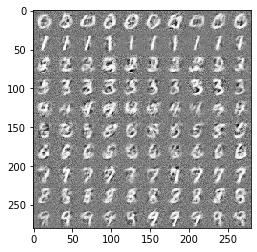

EPOCH 14 step 7650: D: loss = 0.5233962 G: loss=1.9170399 
EPOCH 14 step 7700: D: loss = 0.5518684 G: loss=1.5925565 
EPOCH 14 step 7750: D: loss = 0.5722984 G: loss=1.5622212 
EPOCH 14 step 7800: D: loss = 0.5181811 G: loss=1.6331494 
EPOCH 14 step 7850: D: loss = 0.5952504 G: loss=1.5161419 
EPOCH 14 step 7900: D: loss = 0.5614083 G: loss=1.5031121 
EPOCH 14 step 7950: D: loss = 0.5510163 G: loss=1.5940728 
EPOCH 14 step 8000: D: loss = 0.5749365 G: loss=1.7435188 
EPOCH 14 step 8050: D: loss = 0.5356383 G: loss=1.6627779 
EPOCH 14 step 8100: D: loss = 0.5164819 G: loss=1.6643496 
EPOCH 14 step 8150: D: loss = 0.5715412 G: loss=1.4718277 


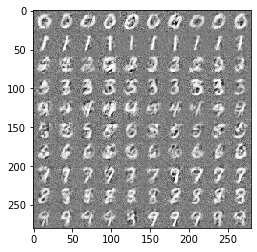

EPOCH 15 step 8200: D: loss = 0.5177231 G: loss=1.6788422 
EPOCH 15 step 8250: D: loss = 0.5134284 G: loss=1.5217874 
EPOCH 15 step 8300: D: loss = 0.5770243 G: loss=1.6554108 
EPOCH 15 step 8350: D: loss = 0.5417094 G: loss=1.5825987 
EPOCH 15 step 8400: D: loss = 0.5716571 G: loss=1.6379101 
EPOCH 15 step 8450: D: loss = 0.5890443 G: loss=1.6707937 
EPOCH 15 step 8500: D: loss = 0.5814356 G: loss=1.4447749 
EPOCH 15 step 8550: D: loss = 0.5024084 G: loss=1.7916342 
EPOCH 15 step 8600: D: loss = 0.5802957 G: loss=1.7156703 
EPOCH 15 step 8650: D: loss = 0.5703992 G: loss=1.7070231 
EPOCH 15 step 8700: D: loss = 0.5105146 G: loss=1.6981754 


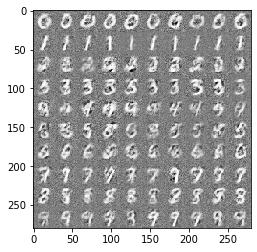

EPOCH 16 step 8750: D: loss = 0.5020832 G: loss=1.7678921 
EPOCH 16 step 8800: D: loss = 0.5197507 G: loss=1.7904452 
EPOCH 16 step 8850: D: loss = 0.5604401 G: loss=1.9934056 
EPOCH 16 step 8900: D: loss = 0.5540273 G: loss=1.5897062 
EPOCH 16 step 8950: D: loss = 0.5202666 G: loss=1.8370476 
EPOCH 16 step 9000: D: loss = 0.5026914 G: loss=1.7945178 
EPOCH 16 step 9050: D: loss = 0.4978202 G: loss=1.8394990 
EPOCH 16 step 9100: D: loss = 0.5390816 G: loss=1.6797924 
EPOCH 16 step 9150: D: loss = 0.5248561 G: loss=1.7556546 
EPOCH 16 step 9200: D: loss = 0.5787225 G: loss=1.8413925 
EPOCH 16 step 9250: D: loss = 0.5623676 G: loss=1.6176405 


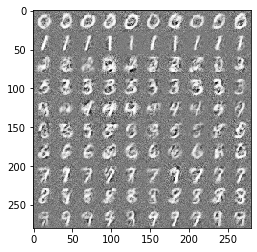

EPOCH 17 step 9300: D: loss = 0.5903000 G: loss=1.7775359 
EPOCH 17 step 9350: D: loss = 0.5557406 G: loss=1.5397948 
EPOCH 17 step 9400: D: loss = 0.6090494 G: loss=1.4435844 
EPOCH 17 step 9450: D: loss = 0.5667244 G: loss=1.6259933 
EPOCH 17 step 9500: D: loss = 0.5662652 G: loss=1.5596899 
EPOCH 17 step 9550: D: loss = 0.6674478 G: loss=1.4945009 
EPOCH 17 step 9600: D: loss = 0.5061255 G: loss=2.0213079 
EPOCH 17 step 9650: D: loss = 0.5428015 G: loss=1.6140081 
EPOCH 17 step 9700: D: loss = 0.5361212 G: loss=1.5831977 
EPOCH 17 step 9750: D: loss = 0.5400457 G: loss=1.8255030 
EPOCH 17 step 9800: D: loss = 0.6093709 G: loss=1.5458645 


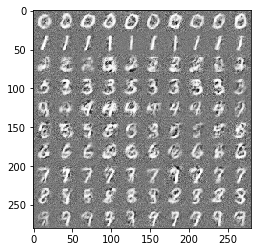

EPOCH 18 step 9850: D: loss = 0.5953360 G: loss=1.8377979 
EPOCH 18 step 9900: D: loss = 0.4811966 G: loss=1.8841584 
EPOCH 18 step 9950: D: loss = 0.5484219 G: loss=1.7471159 
EPOCH 18 step 10000: D: loss = 0.5509073 G: loss=1.4581120 
EPOCH 18 step 10050: D: loss = 0.5484962 G: loss=1.7542353 
EPOCH 18 step 10100: D: loss = 0.5468983 G: loss=1.7288340 
EPOCH 18 step 10150: D: loss = 0.6002217 G: loss=1.6304775 
EPOCH 18 step 10200: D: loss = 0.5663308 G: loss=1.7336601 
EPOCH 18 step 10250: D: loss = 0.5760618 G: loss=1.4950233 
EPOCH 18 step 10300: D: loss = 0.5987453 G: loss=1.9177599 
EPOCH 18 step 10350: D: loss = 0.5984640 G: loss=1.7759411 


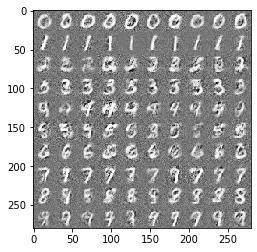

EPOCH 19 step 10400: D: loss = 0.5671731 G: loss=1.4189152 
EPOCH 19 step 10450: D: loss = 0.5706506 G: loss=1.6937320 
EPOCH 19 step 10500: D: loss = 0.5392942 G: loss=1.5592823 
EPOCH 19 step 10550: D: loss = 0.5193364 G: loss=1.7062236 
EPOCH 19 step 10600: D: loss = 0.5397832 G: loss=1.7378051 
EPOCH 19 step 10650: D: loss = 0.5148304 G: loss=1.6817558 
EPOCH 19 step 10700: D: loss = 0.4750111 G: loss=2.0076201 
EPOCH 19 step 10750: D: loss = 0.5726616 G: loss=1.4785767 
EPOCH 19 step 10800: D: loss = 0.5032026 G: loss=1.6992199 
EPOCH 19 step 10850: D: loss = 0.4881820 G: loss=1.9131351 
EPOCH 19 step 10900: D: loss = 0.5431170 G: loss=1.9026245 


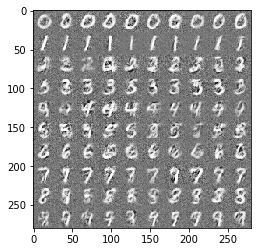

EPOCH 20 step 10950: D: loss = 0.5923339 G: loss=1.6370472 
EPOCH 20 step 11000: D: loss = 0.4742789 G: loss=1.7829338 
EPOCH 20 step 11050: D: loss = 0.5536424 G: loss=1.6327261 
EPOCH 20 step 11100: D: loss = 0.5246382 G: loss=1.7305927 
EPOCH 20 step 11150: D: loss = 0.5556716 G: loss=1.5155053 
EPOCH 20 step 11200: D: loss = 0.5679113 G: loss=1.6511811 
EPOCH 20 step 11250: D: loss = 0.4912977 G: loss=1.5593328 
EPOCH 20 step 11300: D: loss = 0.5630367 G: loss=2.0355072 
EPOCH 20 step 11350: D: loss = 0.5665714 G: loss=1.8341701 
EPOCH 20 step 11400: D: loss = 0.5623136 G: loss=1.9220994 
EPOCH 20 step 11450: D: loss = 0.6531878 G: loss=1.4557542 


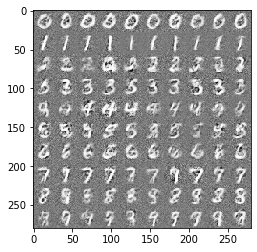

In [10]:
sample_z = np.random.uniform(-1 , 1 , size = [batch_size , sample_size])

y = tf.placeholder(tf.float32, [None , y_dim])

images = tf.placeholder(tf.float32, [batch_size, output_size, output_size, channel])

z = tf.placeholder(tf.float32, [None , sample_size])

fake_images = gern_net(batch_size, z , y ,sample_size, y_dim,output_size)

##the loss of gerenate network
D_pro , D_logits = dis_net(images, y ,  False)

G_pro, G_logits = dis_net(fake_images , y , True)

#### TODO ####
# DEFINE LOSS FUNCTION #

D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logits, labels=tf.ones_like(D_logits)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=G_logits, labels=tf.zeros_like(G_logits)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=G_logits, labels=tf.ones_like(G_logits)))

#############

t_vars = tf.trainable_variables()

d_var = [var for var in t_vars if 'dis' in var.name]
g_var = [var for var in t_vars if 'gen' in var.name]

opti_D = tf.train.AdamOptimizer(learning_rate=learning_rate , beta1=0.5).minimize(D_loss , var_list=d_var)
opti_G = tf.train.AdamOptimizer(learning_rate=learning_rate , beta1=0.5).minimize(G_loss , var_list=g_var)

init = tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess:

    sess.run(init)
    e = 0
    step = 0

    while e <= EPOCH:
        batch_num = 0
        while batch_num < len(data_array) / batch_size - 1:

            step = step + 1

            realbatch_array , real_labels = getNext_batch(data_array , data_y , batch_num, batch_size)
            
            #Get the z
            batch_z = np.random.uniform(-1 , 1 , size=[batch_size , sample_size])

            _ = sess.run(opti_D, feed_dict={images:realbatch_array, z:batch_z , y:real_labels})
            _ = sess.run(opti_G, feed_dict={z: batch_z , y:real_labels})

            batch_num += 1

            if step % loss_step == 0:

                d_get_loss = sess.run(D_loss , feed_dict = {images:realbatch_array , z:batch_z , y:real_labels})
                g_get_loss = sess.run(G_loss , feed_dict = {z: batch_z , y:real_labels})
                print("EPOCH %d step %d: D: loss = %.7f G: loss=%.7f " % (e , step , d_get_loss , g_get_loss))

            if np.mod(step , display_step) == 1:

                sample_images = sess.run(fake_images , feed_dict={z:sample_z , y:sample_label(batch_size)})
                sample_images = sample_images[:100,:,:,:]
                image_name = './{}/train_{:02d}_{:04d}.png'.format(sample_dir , e , step)
                save_images(sample_images , [10,10] , image_name)

        img = mpimg.imread(image_name)
        imgplot = plt.imshow(img)
        plt.show()

        e = e + 1
        batch_num = 0
